In [9]:
#importing necessary libraries and the cleaned dataset
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import datetime as dt
%matplotlib inline
CleanDataset = r'D:\SEM 4\DAB402 - CAPSTONE PROJECT\Cleansed_Dataset\OnlineRetail_Cleaned.csv'
Data_Cleaned = pd.read_csv(CleanDataset, index_col = 'InvoiceDate')


In [10]:
Data_Cleaned

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,FinalPrice,InvoiceMonth,Day of week,Date
InvoiceDate,,,,,,,,,,,
12-01-2010 08:26,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,UNITED KINGDOM,15.30,Dec,Wednesday,2010-12
12-01-2010 08:26,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,UNITED KINGDOM,20.34,Dec,Wednesday,2010-12
12-01-2010 08:26,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,UNITED KINGDOM,22.00,Dec,Wednesday,2010-12
12-01-2010 08:26,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,UNITED KINGDOM,20.34,Dec,Wednesday,2010-12
12-01-2010 08:26,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,3.39,17850.0,UNITED KINGDOM,20.34,Dec,Wednesday,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
12-09-2011 12:50,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,FRANCE,10.20,Dec,Friday,2011-12
12-09-2011 12:50,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,FRANCE,12.60,Dec,Friday,2011-12
12-09-2011 12:50,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,FRANCE,16.60,Dec,Friday,2011-12


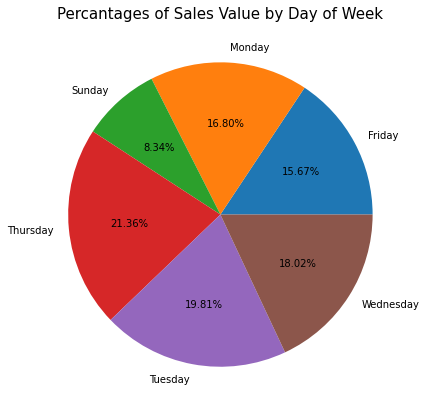

In [11]:
#creating the pie chart
Data_Cleaned.groupby('Day of week')['FinalPrice'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Sales Value by Day of Week', fontsize = 15)
plt.show()

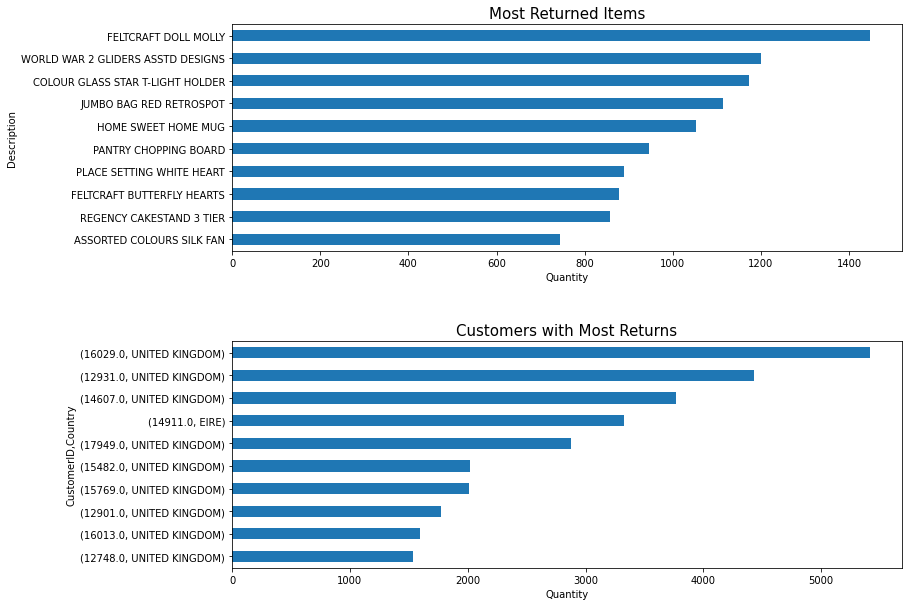

In [12]:
#finding the most returned items and the customers with the corresponding country
ReturnedItems = Data_Cleaned[Data_Cleaned.Quantity<0].groupby('Description')['Quantity'].sum()
ReturnedItems = ReturnedItems.abs().sort_values(ascending=False)[0:10]
ReturnCust = Data_Cleaned[Data_Cleaned.Quantity<0].groupby(['CustomerID','Country'])['Quantity'].sum()
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]
#creting the subplot
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
ReturnedItems.sort_values().plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
ReturnCust.sort_values().plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)
ax1.set(xlabel='Quantity')
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()

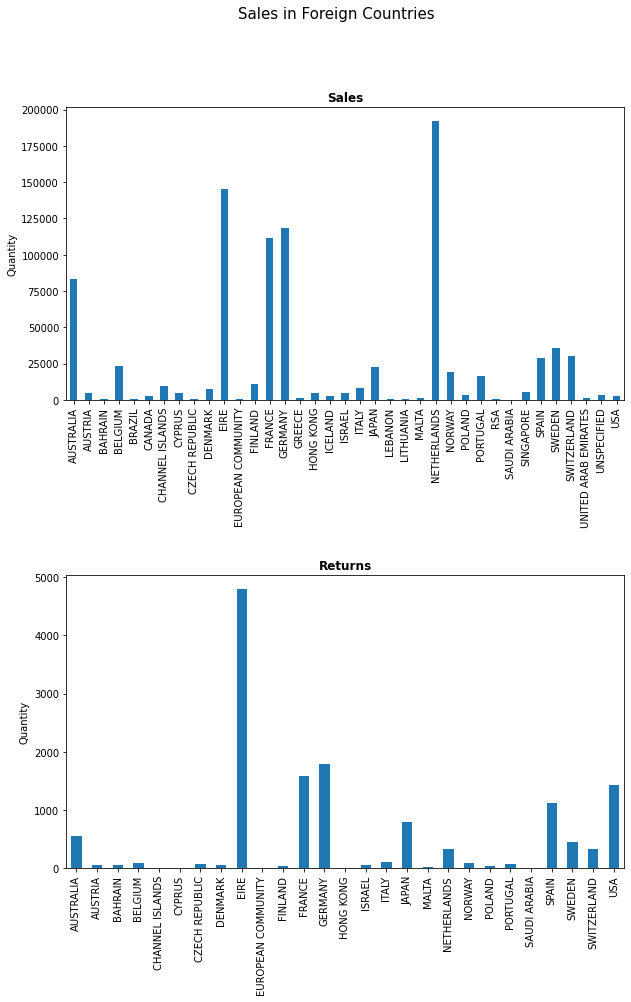

In [13]:
#grouping data by the countries(except UK)
ByCountrySale = Data_Cleaned[(Data_Cleaned.Country != 'UNITED KINGDOM') & (Data_Cleaned.Quantity > 0)].groupby('Country')['Quantity'].sum()
ByCountryRet = Data_Cleaned[(Data_Cleaned.Country != 'UNITED KINGDOM') & (Data_Cleaned.Quantity < 0)].groupby('Country')['Quantity'].sum().abs()
#creating the subplot
fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10,14))
ByCountrySale.plot(kind='bar', ax=ax1).set(ylabel = 'Quantity',xlabel='')
ax1.set_title('Sales', size=12, fontweight = 'bold')
ByCountryRet.plot(kind='bar', ax=ax2).set(ylabel = 'Quantity',xlabel='')
ax2.set_title('Returns', size=12, fontweight = 'bold')
plt.suptitle('Sales in Foreign Countries', fontsize = 15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


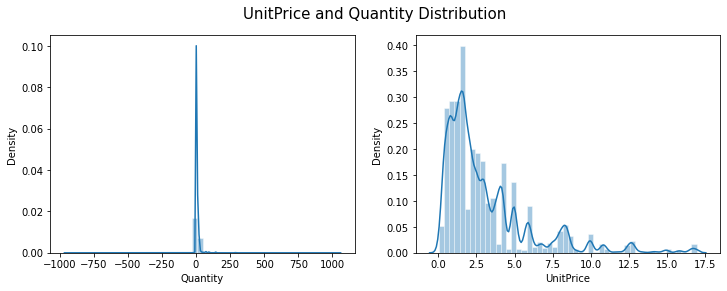

In [14]:
#creating distribution plots
fig , [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
with sns.axes_style('dark'):
    sns.distplot(Data_Cleaned['Quantity'], ax=ax1)
    sns.distplot(Data_Cleaned['UnitPrice'], ax=ax2)
fig.suptitle('UnitPrice and Quantity Distribution', fontsize = 15)
plt.show()

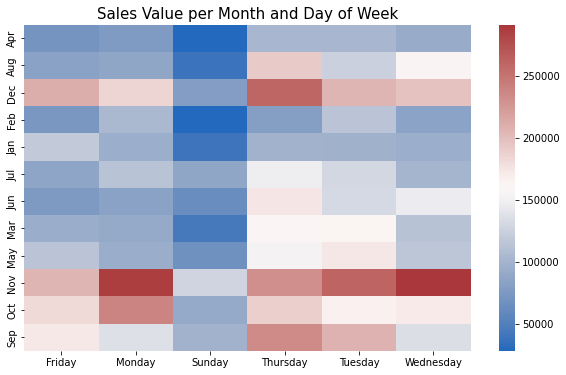

In [15]:
HM_Data = Data_Cleaned.pivot_table(index = 'InvoiceMonth',columns = 'Day of week', values = 'FinalPrice', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()